In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# export PYTHONPATH=${PYTHONPATH}:/home/jovyan/anomalies-detection/

Делали допущения по распределениям для сглаживания и их надо доработать в будущем (добавить в заключение)

In [29]:
reports = pd.read_csv('../reports/mp/files/scores.csv')

In [24]:
reports_rolling_window = pd.read_csv('../reports/rolling_window/files/scores.csv')
reports_naive = pd.read_csv('../reports/naive/files/scores.csv')

In [4]:
reports_rolling_window.head()

model                   target_col  n_experiments  anom_coeff  \
0  fbprophet          ('DME-ORY', 'seat')             80           0   
1  fbprophet                         seat             80           0   
2  fbprophet                        total             80           0   
3  fbprophet  ('AAQ-DME', 'auto_checkin')             80           0   
4  fbprophet  ('DME-GDZ', 'auto_checkin')             80           0   

   num_anomalies  in_a_row  interval_width  f1_score  precision  recall  
0              3      True             0.6  0.034535   0.017571  1.0000  
1              3      True             0.6  0.068405   0.035414  1.0000  
2              3      True             0.6  0.072727   0.037736  1.0000  
3              3      True             0.6  0.041691   0.021347  0.8875  
4              3      True             0.6  0.034180   0.017412  0.9250

In [68]:
reports = pd.concat([reports[reports.num_anomalies != 3], reports_rolling_window])

In [142]:
#reports = pd.read_csv('../reports/files/scores_more_days.csv')
reports = pd.read_csv('../reports/files/scores_more_days_window_minus_1.csv')

In [143]:
reports.interval_width.max()

1.0

Target = ['total', 'seat']	Params = {'anom_coeff': 0, 'num_anomalies': 4, 'in_a_row': True}


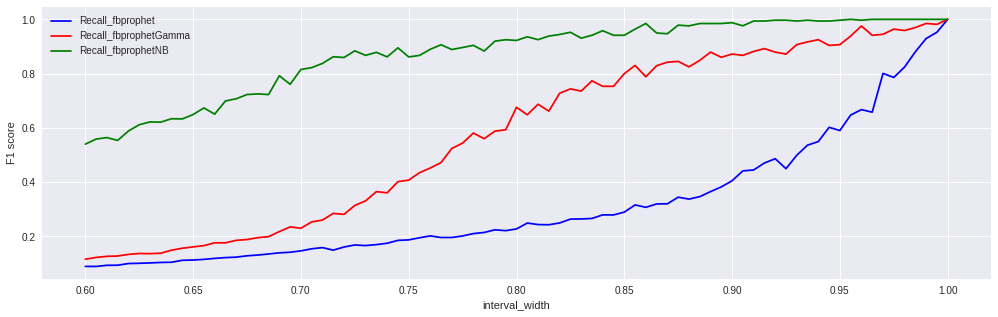

Target = ['total', 'seat']	Params = {'anom_coeff': 0, 'num_anomalies': 5, 'in_a_row': True}


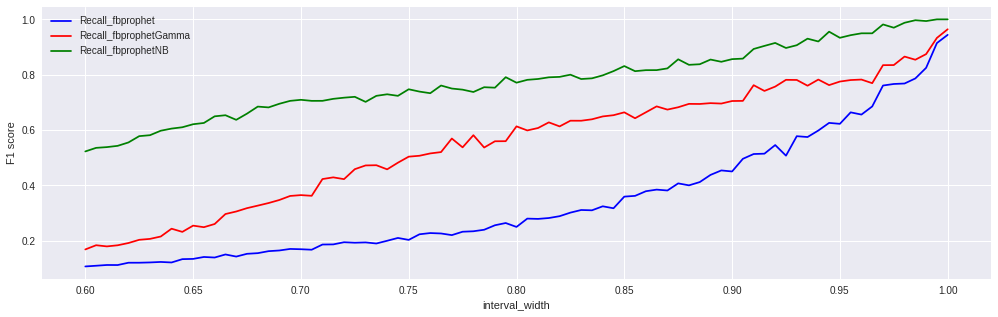

Target = ['gift_certificate']	Params = {'anom_coeff': 0, 'num_anomalies': 4, 'in_a_row': True}


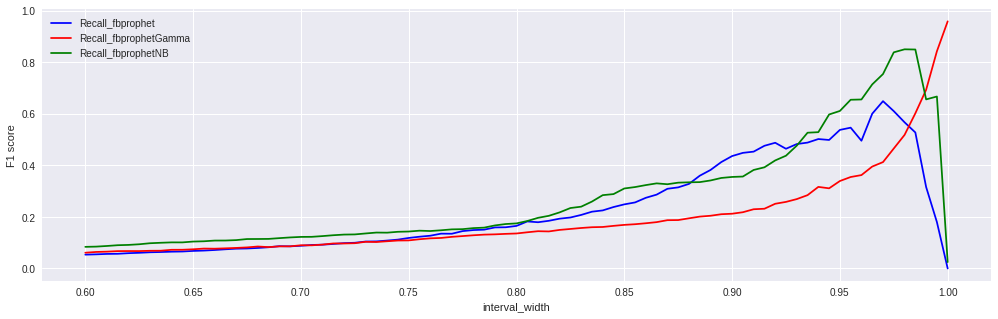

Target = ['gift_certificate']	Params = {'anom_coeff': 0, 'num_anomalies': 5, 'in_a_row': True}


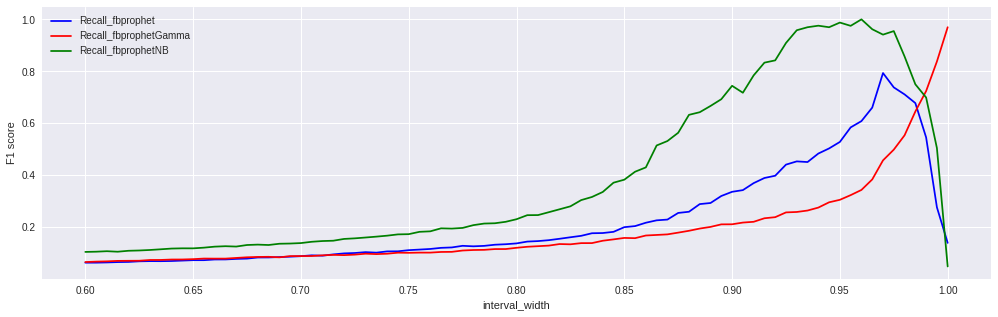

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]	Params = {'anom_coeff': 0, 'num_anomalies': 4, 'in_a_row': True}


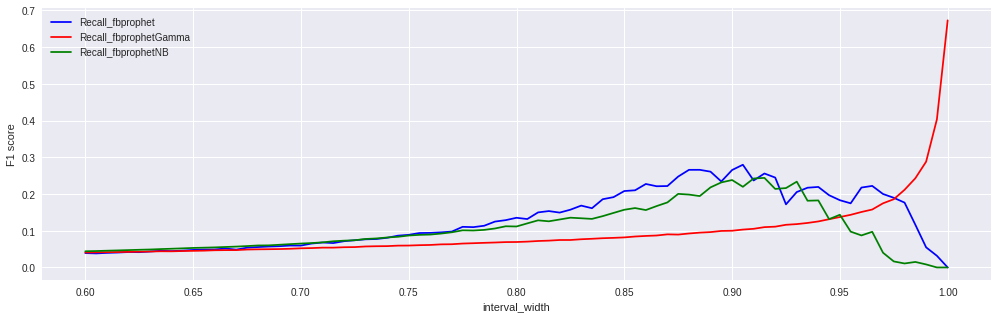

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]	Params = {'anom_coeff': 0, 'num_anomalies': 5, 'in_a_row': True}


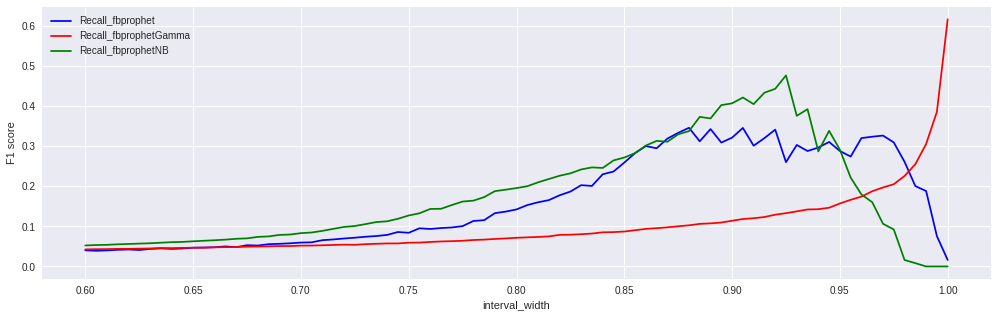

In [144]:
cols = [['total', 'seat'], ['gift_certificate'], ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]] # ('SPU-DME', 'seat'), ('RHO-DME', 'meal')]
scenarios = [{'anom_coeff': 0,
              'num_anomalies': 4,
              'in_a_row': True
             },
             {'anom_coeff': 0,
              'num_anomalies': 5,
              'in_a_row': True
             }
]

for target in cols:
    for params in scenarios:
        fig, ax = plt.subplots(figsize=(17, 5))
        print(f'Target = {target}\tParams = {params}')
        for m, color in [('fbprophet', 'blue'), ('fbprophetGamma', 'red'), ('fbprophetNB', 'green')]:
            a = reports[(reports.model == m) & 
                         (reports.target_col.isin(target)) & 
                         (reports.num_anomalies == params['num_anomalies']) & 
                         (reports.anom_coeff == params['anom_coeff']) & 
                         (reports.recall >= 0.0)].sort_values('interval_width')
            a = a.groupby('interval_width').mean().reset_index()
            plt.plot(a.interval_width, a.f1_score, color=color, label=f'Recall_{m}')
            #plt.plot(a.interval_width, a.precision, color=color, linestyle='dashed', label=f'Precision_{m}')
        plt.xlabel('interval_width')
        plt.ylabel('F1 score')
        plt.legend()
        plt.show()

1. 2 дня:
    1. ../reports/files/scores_window_2_old.csv
    2. ../reports/files/scores_window_2_2.csv
    3. ../reports/files/scores_window_2_3.csv
2. 3 дня:
    1. ../reports/rolling_window/files/scores.csv
    2. ../reports/files/scores_window_3_new.csv
    3. ../reports/files/scores_window_3.csv

In [145]:
reports = pd.read_csv('../reports/mp/files/scores.csv')
reports = pd.read_csv('../reports/files/scores_window_3_33.csv')
reports = pd.read_csv('../reports/rolling_window/files/scores.csv')
#reports1 = pd.read_csv('../reports/files/scores_window_3.csv')

reports = pd.read_csv('../reports/files/scores_more_days.csv')
reports1 = pd.read_csv('../reports/files/scores_more_days_window_minus_1.csv')

Target = ['total', 'seat']	Params = {'anom_coeff': 0, 'num_anomalies': 4, 'in_a_row': True}


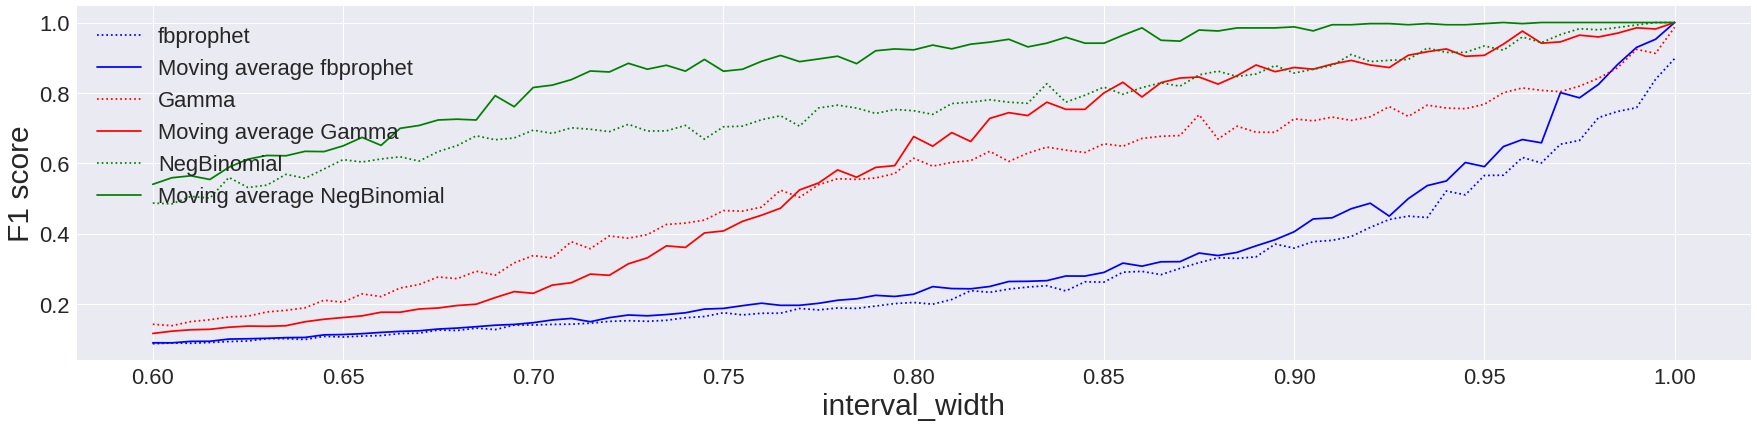

Target = ['total', 'seat']	Params = {'anom_coeff': 0, 'num_anomalies': 5, 'in_a_row': True}


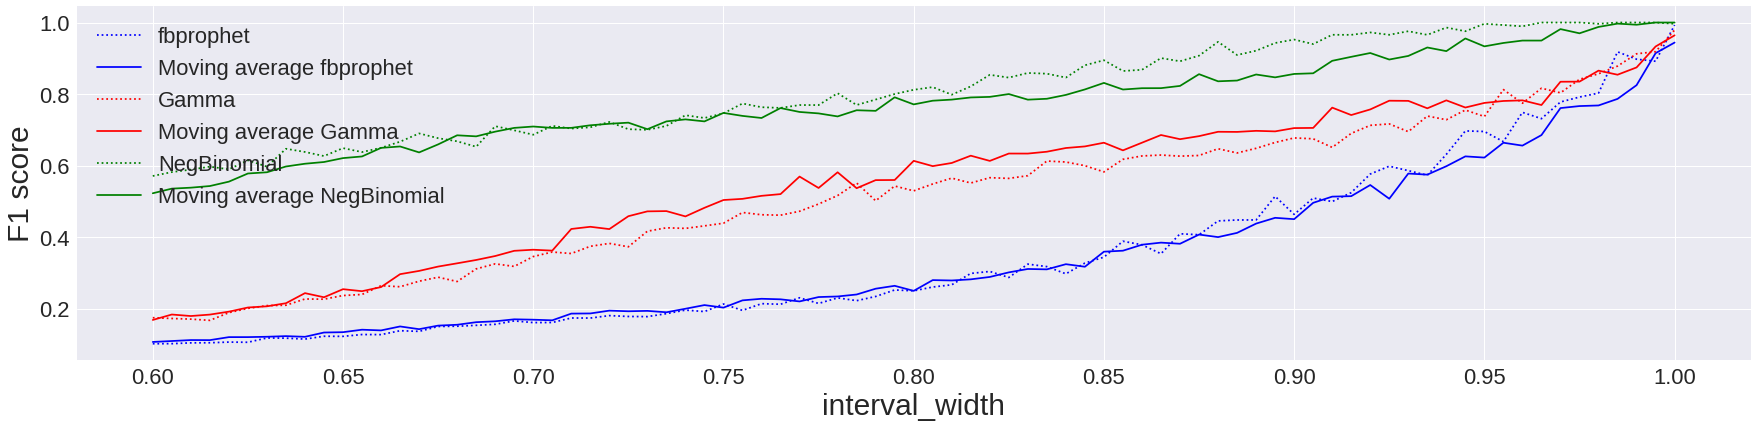

Target = ['gift_certificate']	Params = {'anom_coeff': 0, 'num_anomalies': 4, 'in_a_row': True}


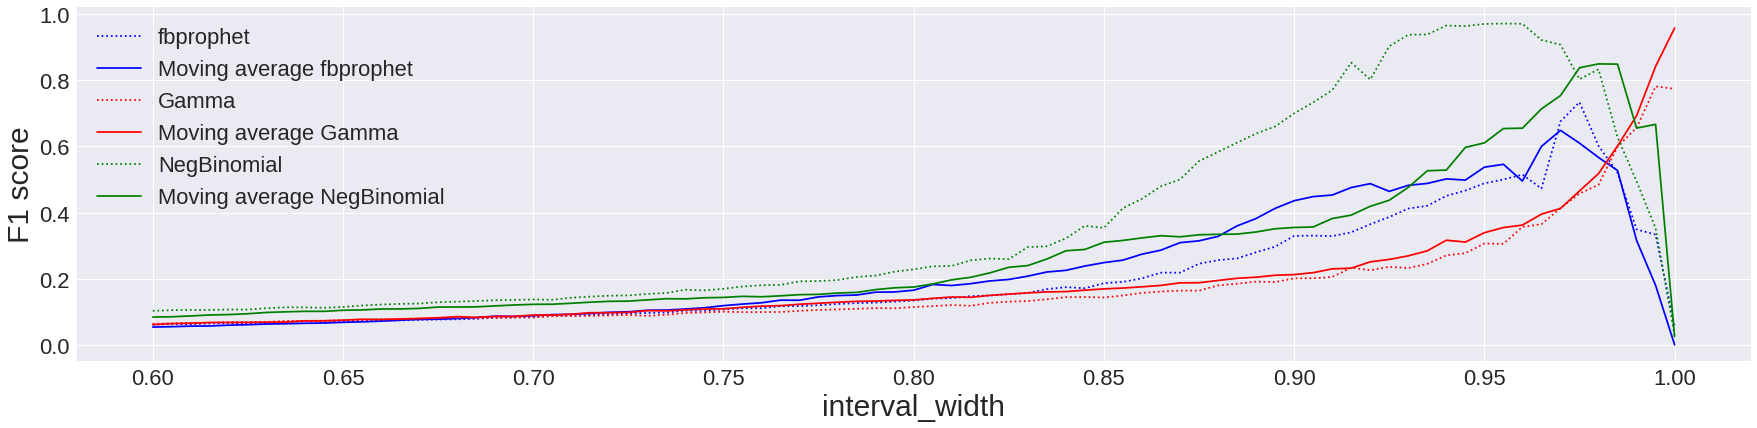

Target = ['gift_certificate']	Params = {'anom_coeff': 0, 'num_anomalies': 5, 'in_a_row': True}


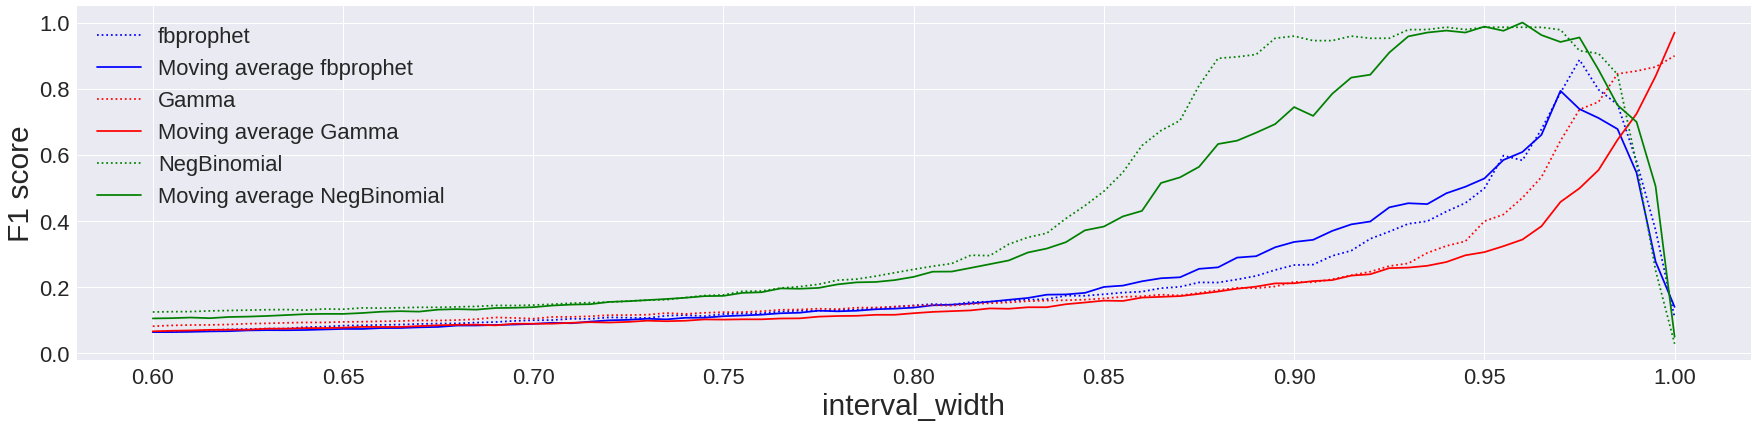

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]	Params = {'anom_coeff': 0, 'num_anomalies': 4, 'in_a_row': True}


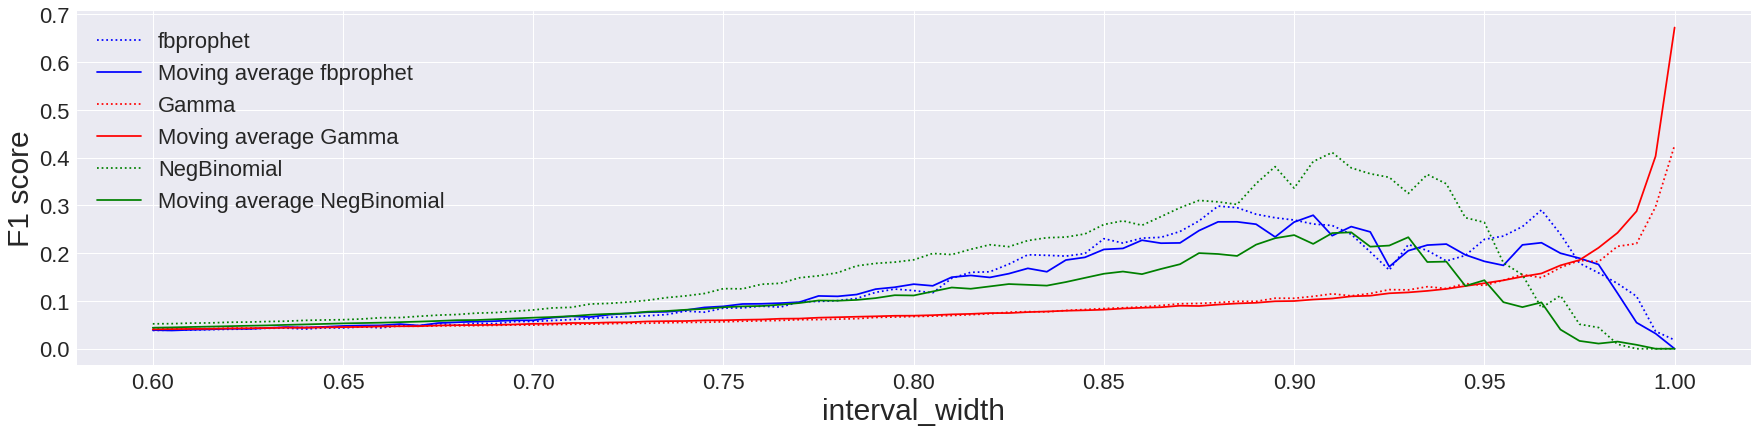

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]	Params = {'anom_coeff': 0, 'num_anomalies': 5, 'in_a_row': True}


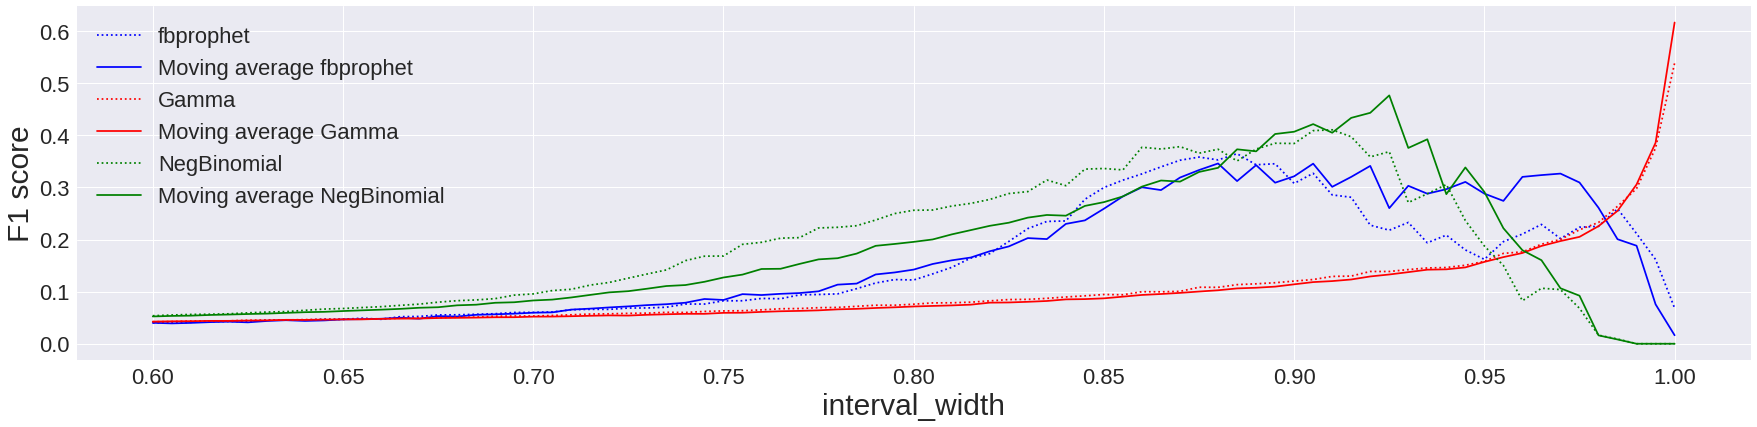

In [146]:
cols = [['total', 'seat'], ['gift_certificate'], ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]] # ('SPU-DME', 'seat'), ('RHO-DME', 'meal')]
scenarios = [{'anom_coeff': 0,
              'num_anomalies': 4,
              'in_a_row': True
             },
            {'anom_coeff': 0,
              'num_anomalies': 5,
              'in_a_row': True
             }
]

for target in cols:
    for params in scenarios:
        fig, ax = plt.subplots(figsize=(30, 6.5))
        print(f'Target = {target}\tParams = {params}')
        for m, color in [('fbprophet', 'blue'), ('fbprophetGamma', 'red'), ('fbprophetNB', 'green')]:
            a = reports[(reports.model == m) & 
                             (reports.target_col.isin(target)) & 
                             (reports.num_anomalies == params['num_anomalies']) & 
                             (reports.anom_coeff == params['anom_coeff'])].sort_values('interval_width')
            a = a.groupby('interval_width').mean().reset_index()
            b = reports1[(reports1.model == m) & 
                             (reports1.target_col.isin(target)) & 
                             (reports1.num_anomalies == params['num_anomalies']) & 
                             (reports1.anom_coeff == params['anom_coeff'])].sort_values('interval_width')
            b = b.groupby('interval_width').mean().reset_index()
            mm = m if m != 'fbprophetNB' else 'fbprophetNegBinomial'
            if m == 'fbprophetNB':
                mm = 'NegBinomial'
            elif m == 'fbprophetGamma':
                mm = 'Gamma'
            else:
                mm = 'fbprophet'
            plt.plot(a.interval_width, a.f1_score, color=color, linestyle=':', label=f'{mm}')
            plt.plot(b.interval_width, b.f1_score, color=color, label=f'Moving average {mm}')
        plt.xlabel('interval_width', fontsize=30)
        plt.ylabel('F1 score', fontsize=30)
        plt.legend(fontsize=22, loc='upper left')
        plt.xticks(fontsize=22)
        plt.yticks(fontsize=22)
        plt.show()

1. Prophet проверить недельную сезонность (гистограммы)
2. Показать, что сглаживание данных не меняет модель (тренд и сезонность), меняет только шум
3. Оформить все 3 варианта сглаживания и провести анализ

Target = ['total', 'seat']	Params = {'anom_coeff': 0, 'num_anomalies': 1, 'in_a_row': False}


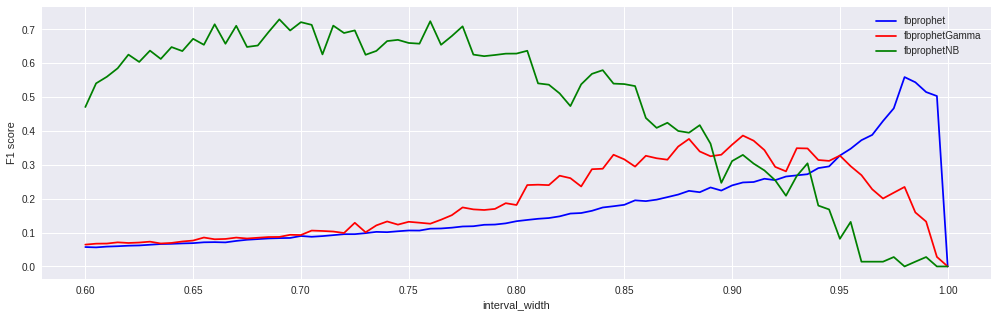

Target = ['total', 'seat']	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}


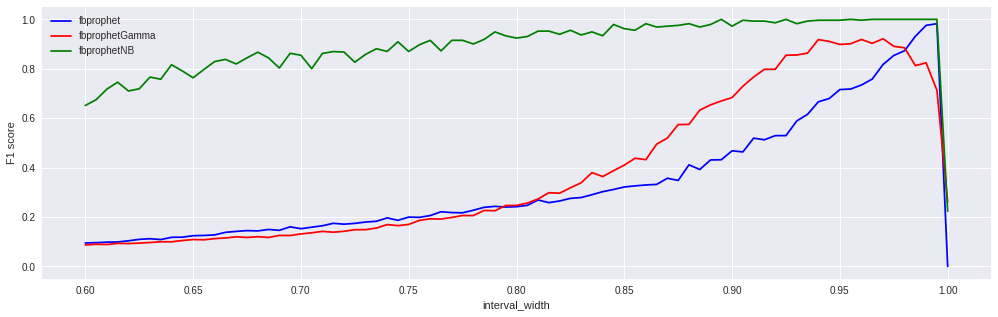

Target = ['gift_certificate']	Params = {'anom_coeff': 0, 'num_anomalies': 1, 'in_a_row': False}


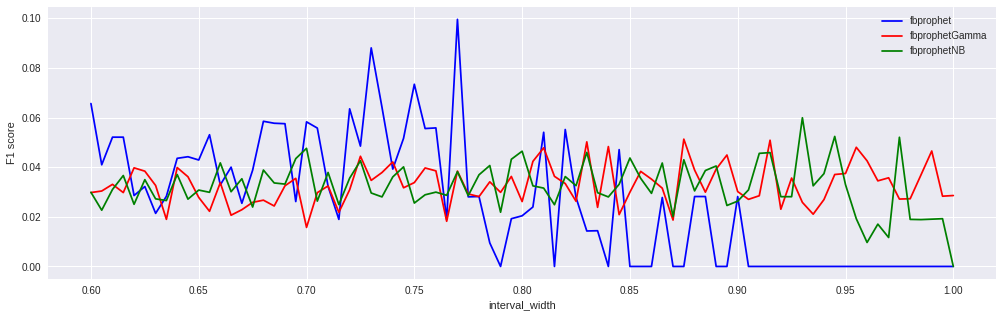

Target = ['gift_certificate']	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}


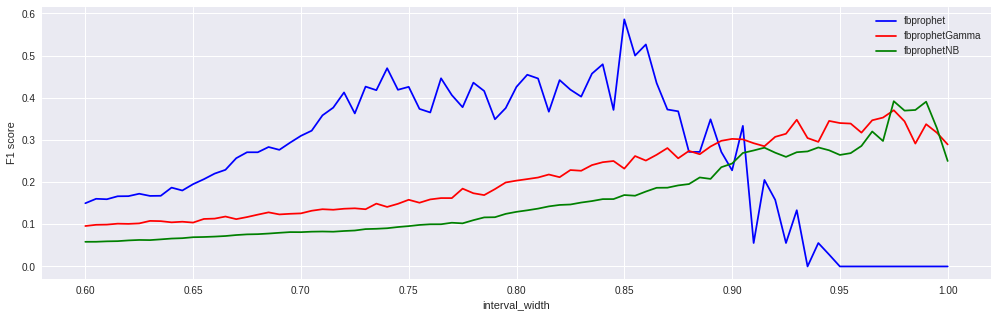

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]	Params = {'anom_coeff': 0, 'num_anomalies': 1, 'in_a_row': False}


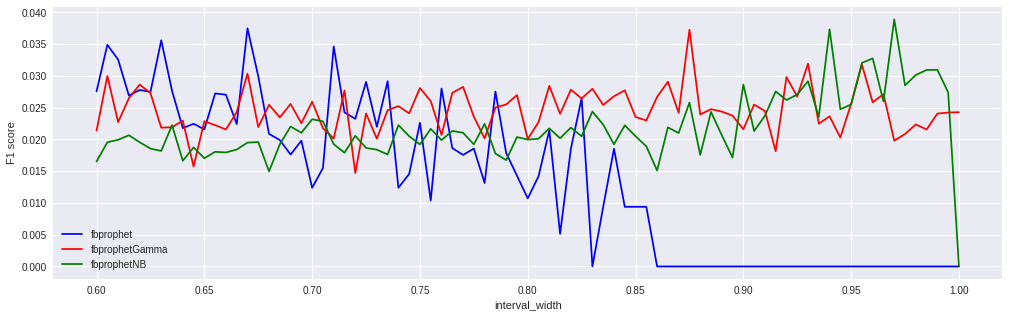

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}


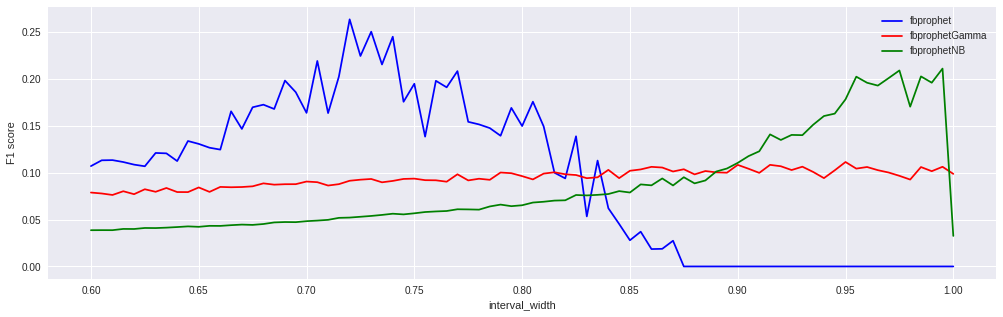

In [15]:
cols = [['total', 'seat'], ['gift_certificate'], ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]] # ('SPU-DME', 'seat'), ('RHO-DME', 'meal')]
scenarios = [{'anom_coeff': 0,
              'num_anomalies': 1,
              'in_a_row': False
             },
            {'anom_coeff': 0,
              'num_anomalies': 3,
              'in_a_row': True
             }
]

for target in cols:
    for params in scenarios:
        fig, ax = plt.subplots(figsize=(17, 5))
        print(f'Target = {target}\tParams = {params}')
        for m, color in [('fbprophet', 'blue'), ('fbprophetGamma', 'red'), ('fbprophetNB', 'green')]:
            a = reports[(reports.model == m) & 
                             (reports.target_col.isin(target)) & 
                             (reports.num_anomalies == params['num_anomalies']) & 
                             (reports.anom_coeff == params['anom_coeff'])].sort_values('interval_width')
            a = a.groupby('interval_width').mean().reset_index()
            plt.plot(a.interval_width, a.f1_score, color=color, label=f'{m}')
#         b = reports_naive[(reports_naive.target_col.isin(target)) & 
#                  (reports_naive.num_anomalies == params['num_anomalies']) & 
#                  (reports_naive.anom_coeff == params['anom_coeff'])][['f1_score']].mean()
#         plt.hlines(b.f1_score, xmin=0.6, xmax=1, color='k', label='naive', linestyles='dashed')
        plt.xlabel('interval_width')
        plt.ylabel('F1 score')
        plt.legend()
        plt.show()

In [33]:
0.33/(0.85+0.33) * 2

0.5593220338983051

Target = ['total', 'seat']	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}


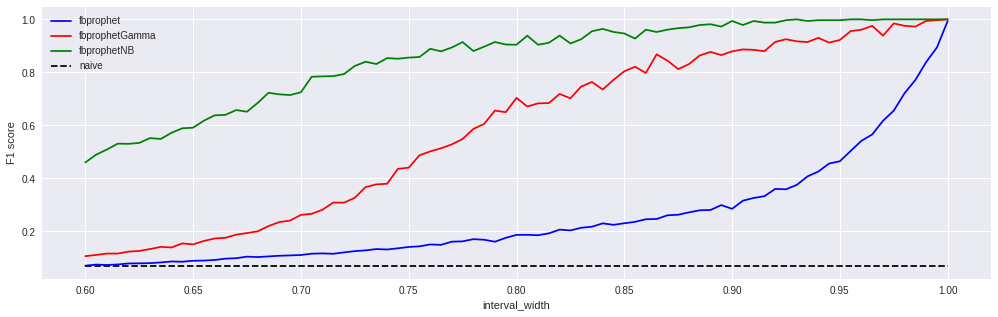

Target = ['gift_certificate']	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}


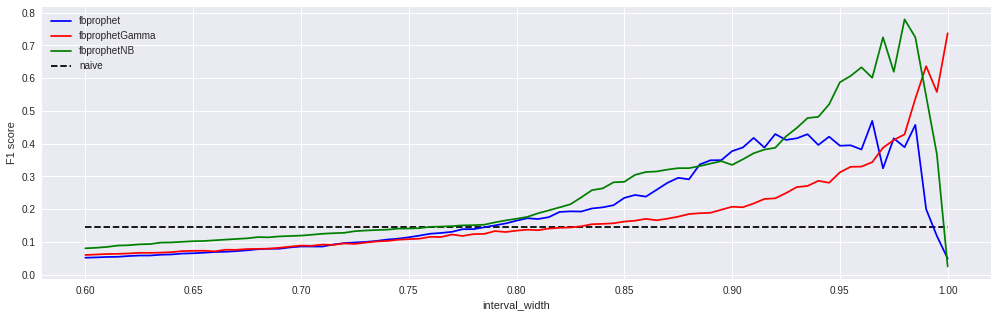

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}


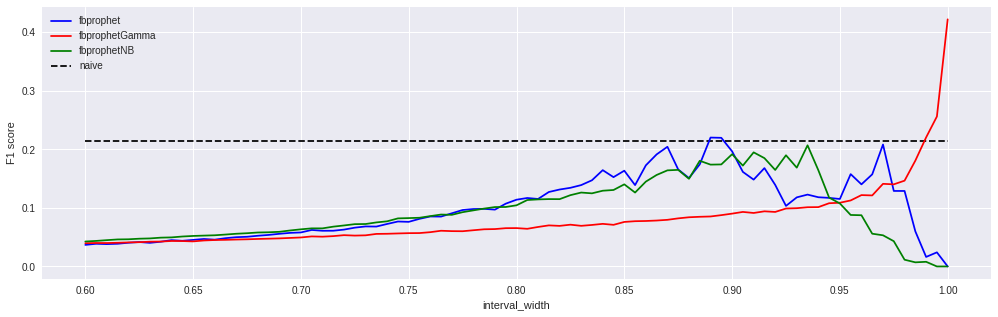

In [74]:
cols = [['total', 'seat'], ['gift_certificate'], ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]] # ('SPU-DME', 'seat'), ('RHO-DME', 'meal')]
scenarios = [{'anom_coeff': 0,
              'num_anomalies': 3,
              'in_a_row': True
             }
]

for target in cols:
    for params in scenarios:
        fig, ax = plt.subplots(figsize=(17, 5))
        print(f'Target = {target}\tParams = {params}')
        for m, color in [('fbprophet', 'blue'), ('fbprophetGamma', 'red'), ('fbprophetNB', 'green')]:
            a = reports[(reports.model == m) & 
                             (reports.target_col.isin(target)) & 
                             (reports.num_anomalies == params['num_anomalies']) & 
                             (reports.anom_coeff == params['anom_coeff'])].sort_values('interval_width')
            a = a.groupby('interval_width').mean().reset_index()
            plt.plot(a.interval_width, a.f1_score, color=color, label=f'{m}')
        b = reports_naive[(reports_naive.target_col.isin(target)) & 
                 (reports_naive.num_anomalies == params['num_anomalies']) & 
                 (reports_naive.anom_coeff == params['anom_coeff'])][['f1_score']].mean()
        plt.hlines(b.f1_score, xmin=0.6, xmax=1, color='k', label='naive', linestyles='dashed')
        plt.xlabel('interval_width')
        plt.ylabel('F1 score')
        plt.legend()
        plt.show()

Target = ['total', 'seat']	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}


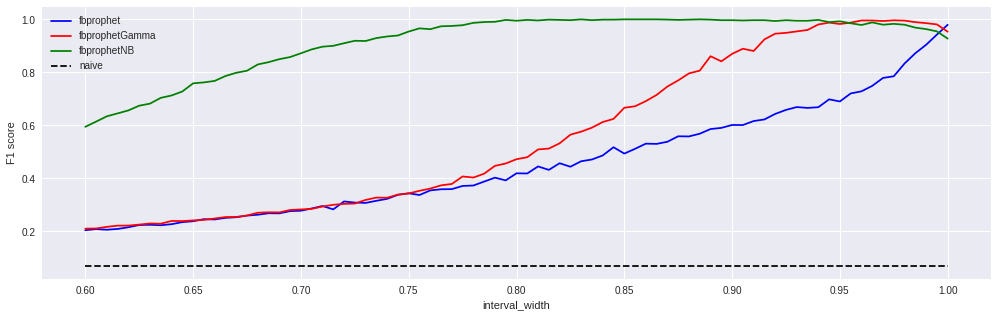

Target = ['gift_certificate']	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}


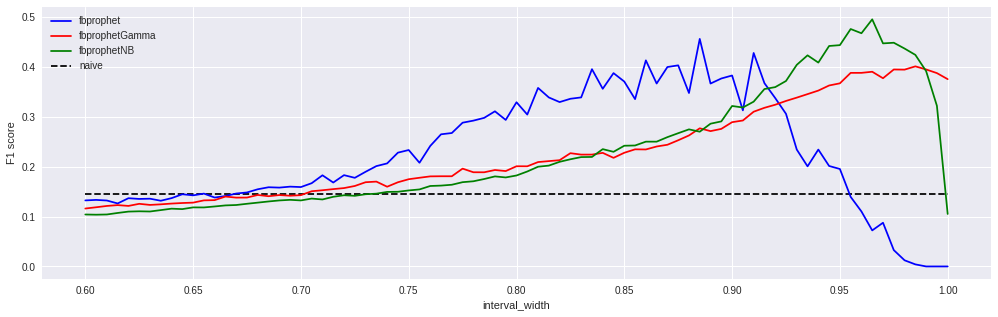

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}


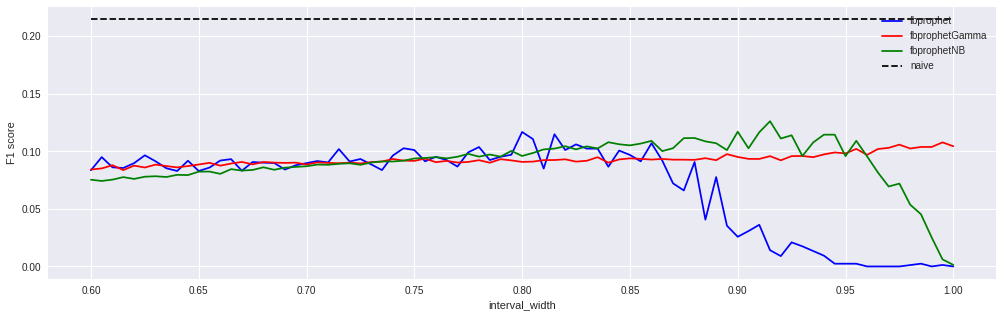

In [77]:
cols = [['total', 'seat'], ['gift_certificate'], ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]] # ('SPU-DME', 'seat'), ('RHO-DME', 'meal')]
scenarios = [{'anom_coeff': 0,
              'num_anomalies': 3,
              'in_a_row': True
             }
]

for target in cols:
    for params in scenarios:
        fig, ax = plt.subplots(figsize=(17, 5))
        print(f'Target = {target}\tParams = {params}')
        for m, color in [('fbprophet', 'blue'), ('fbprophetGamma', 'red'), ('fbprophetNB', 'green')]:
            a = reports[(reports.model == m) & 
                             (reports.target_col.isin(target)) & 
                             (reports.num_anomalies == params['num_anomalies']) & 
                             (reports.anom_coeff == params['anom_coeff'])].sort_values('interval_width')
            a = a.groupby('interval_width').mean().reset_index()
            plt.plot(a.interval_width, a.f1_score, color=color, label=f'{m}')
        b = reports_naive[(reports_naive.target_col.isin(target)) & 
                 (reports_naive.num_anomalies == params['num_anomalies']) & 
                 (reports_naive.anom_coeff == params['anom_coeff'])][['f1_score']].mean()
        plt.hlines(b.f1_score, xmin=0.6, xmax=1, color='k', label='naive', linestyles='dashed')
        plt.xlabel('interval_width')
        plt.ylabel('F1 score')
        plt.legend()
        plt.show()

Target = ['total', 'seat']	Params = {'anom_coeff': 0.833, 'num_anomalies': 1, 'in_a_row': False}


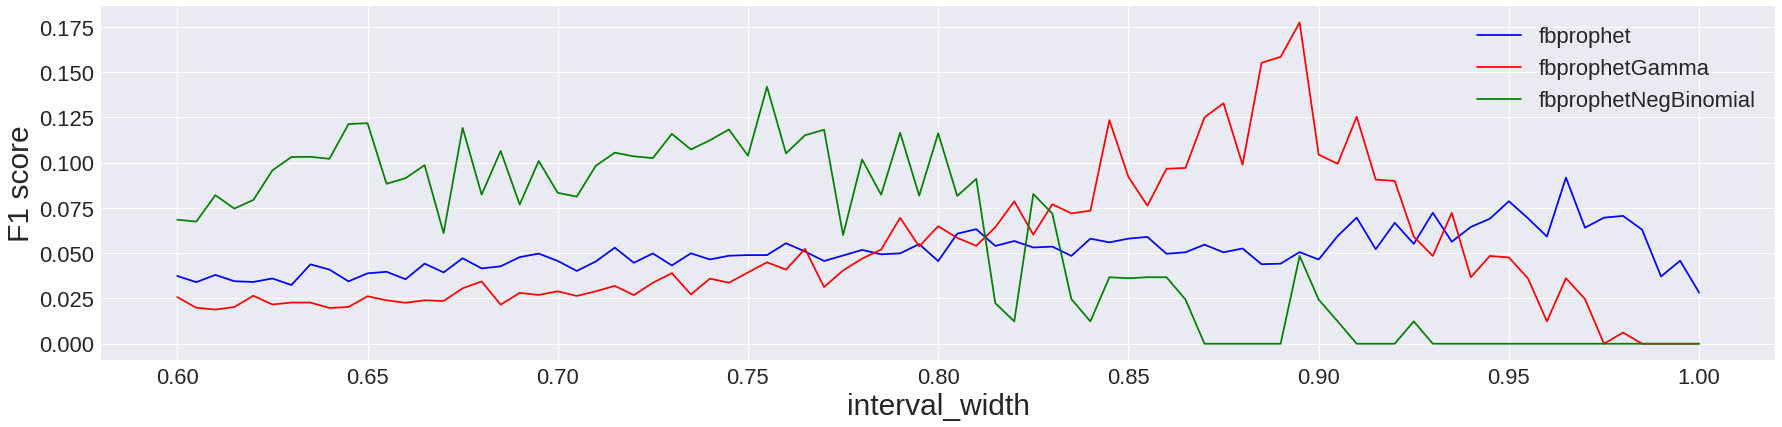

Target = ['total', 'seat']	Params = {'anom_coeff': 0.66, 'num_anomalies': 1, 'in_a_row': False}


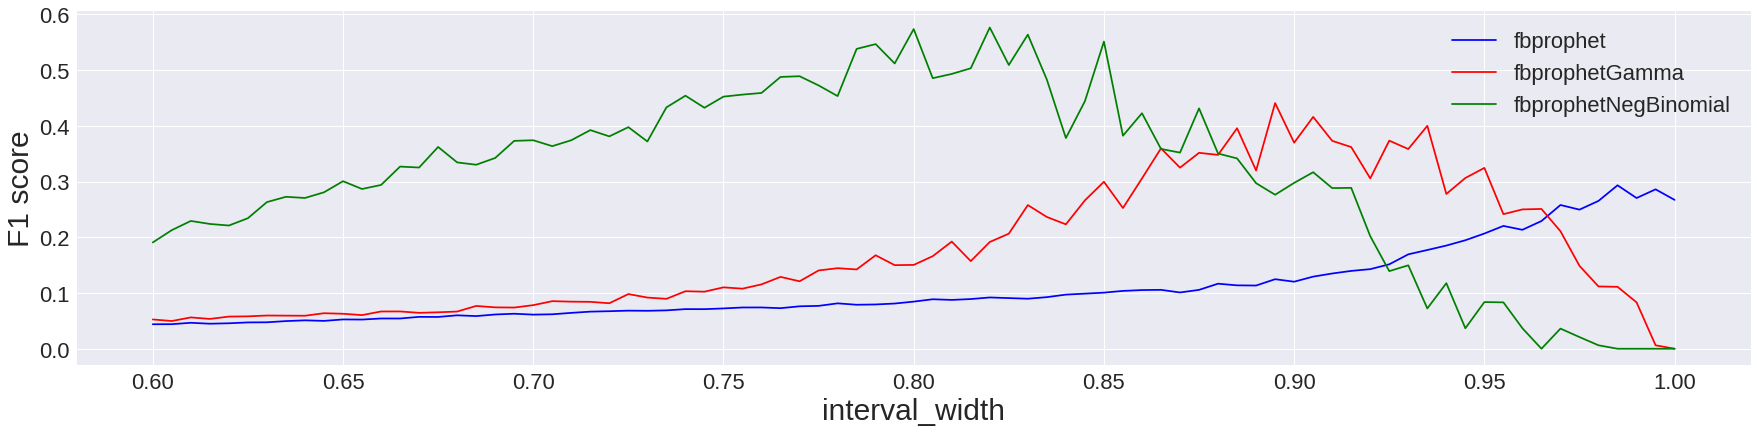

Target = ['total', 'seat']	Params = {'anom_coeff': 0, 'num_anomalies': 1, 'in_a_row': False}


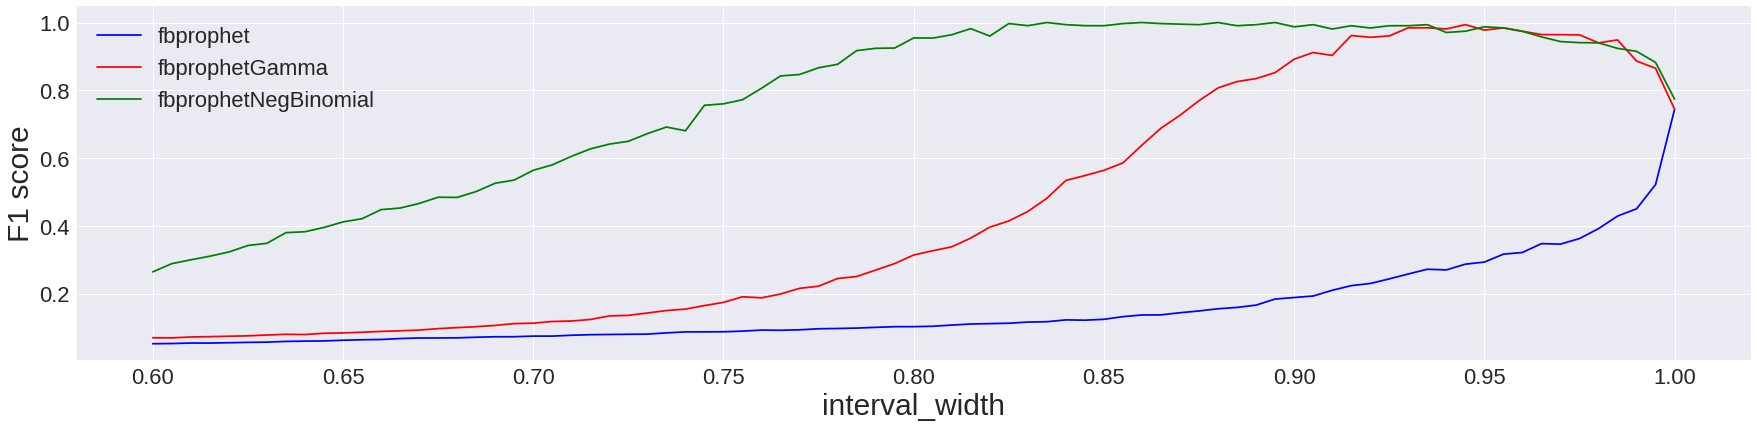

Target = ['total', 'seat']	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}


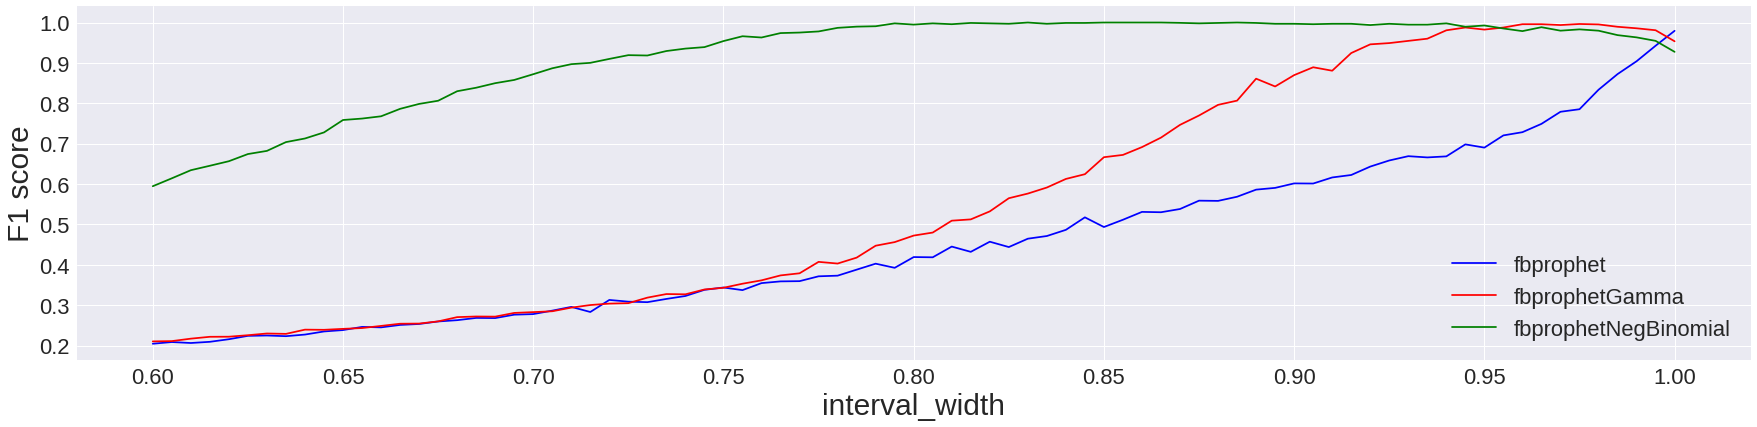

Target = ['gift_certificate']	Params = {'anom_coeff': 0.833, 'num_anomalies': 1, 'in_a_row': False}


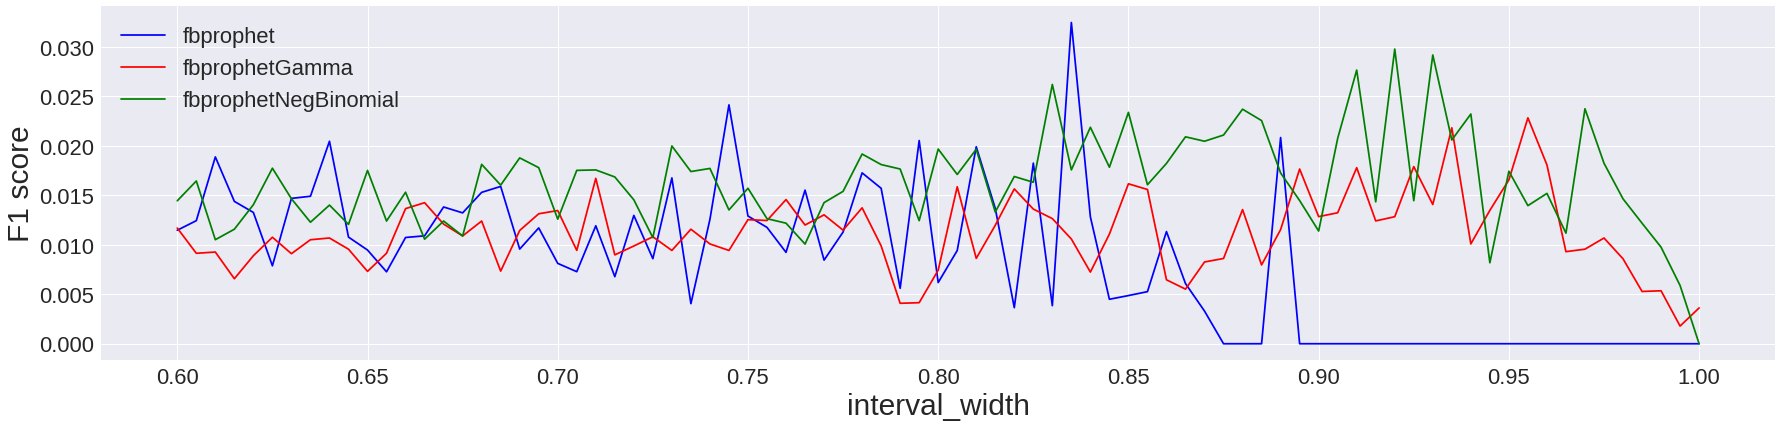

Target = ['gift_certificate']	Params = {'anom_coeff': 0.66, 'num_anomalies': 1, 'in_a_row': False}


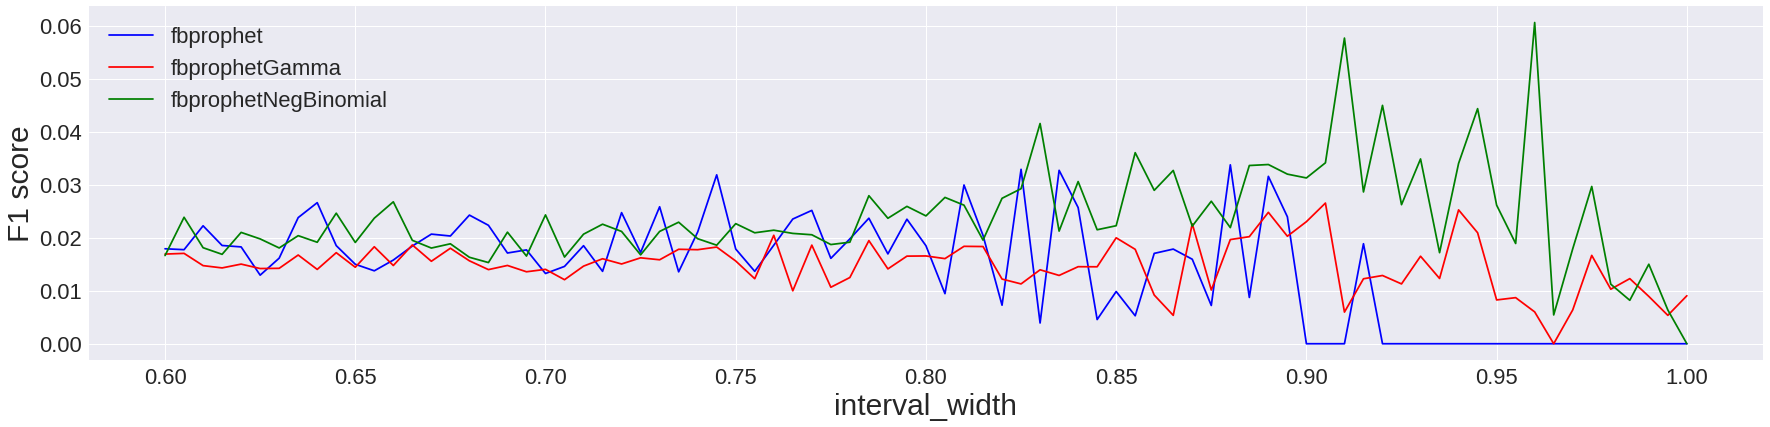

Target = ['gift_certificate']	Params = {'anom_coeff': 0, 'num_anomalies': 1, 'in_a_row': False}


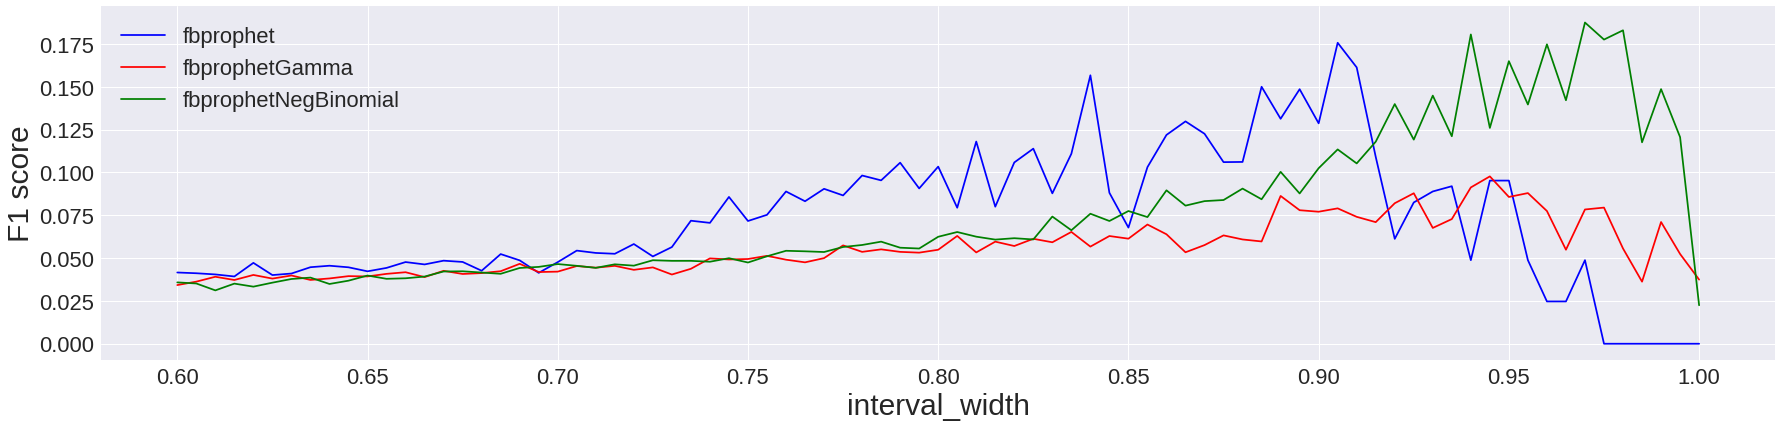

Target = ['gift_certificate']	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}


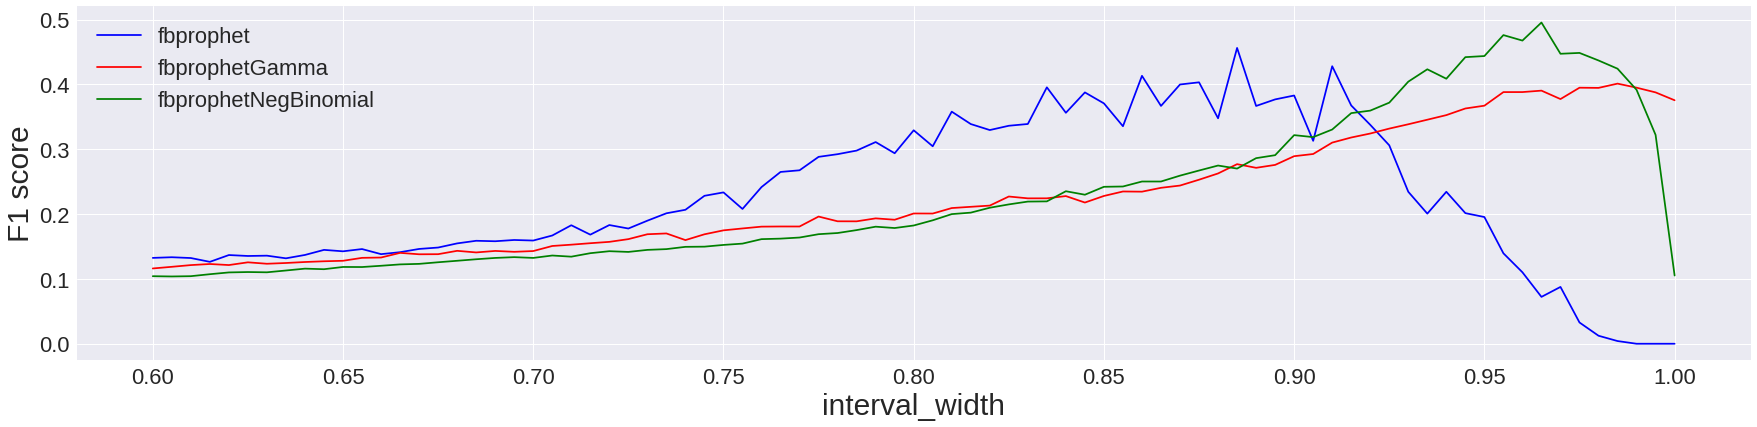

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]	Params = {'anom_coeff': 0.833, 'num_anomalies': 1, 'in_a_row': False}


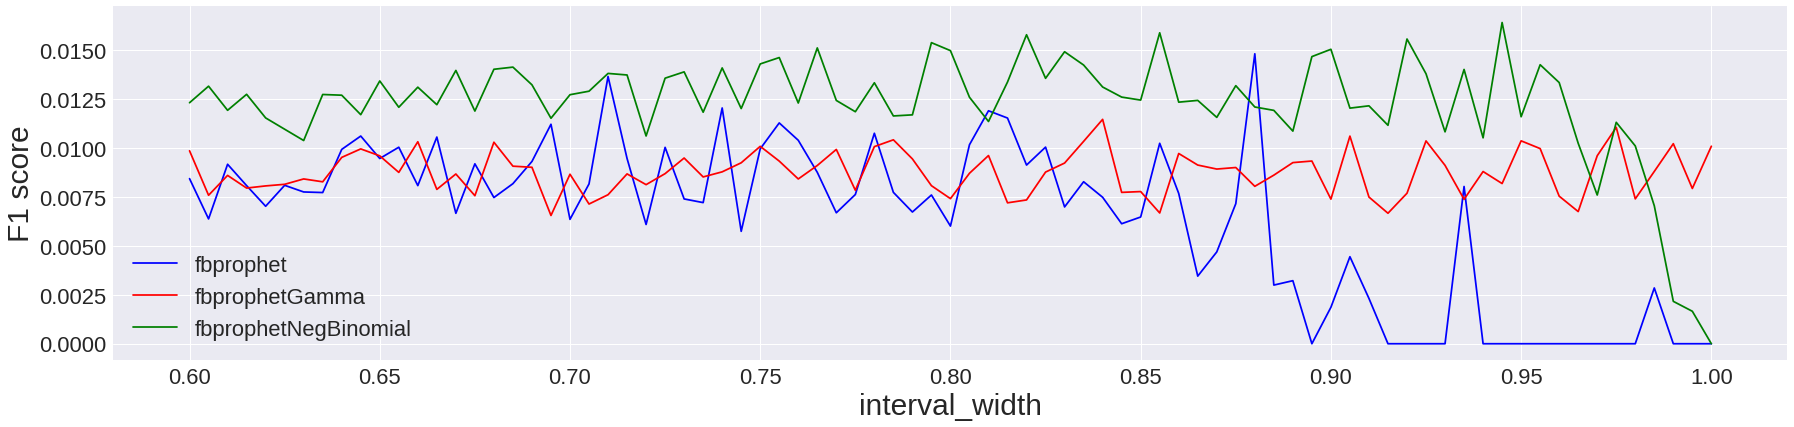

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]	Params = {'anom_coeff': 0.66, 'num_anomalies': 1, 'in_a_row': False}


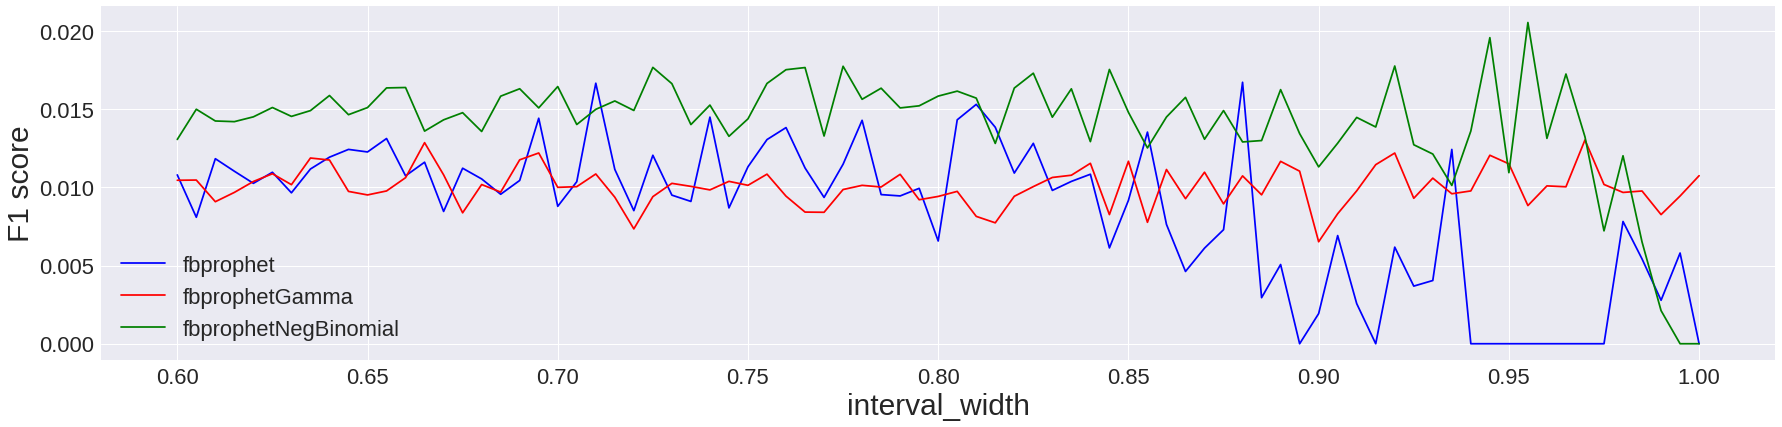

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]	Params = {'anom_coeff': 0, 'num_anomalies': 1, 'in_a_row': False}


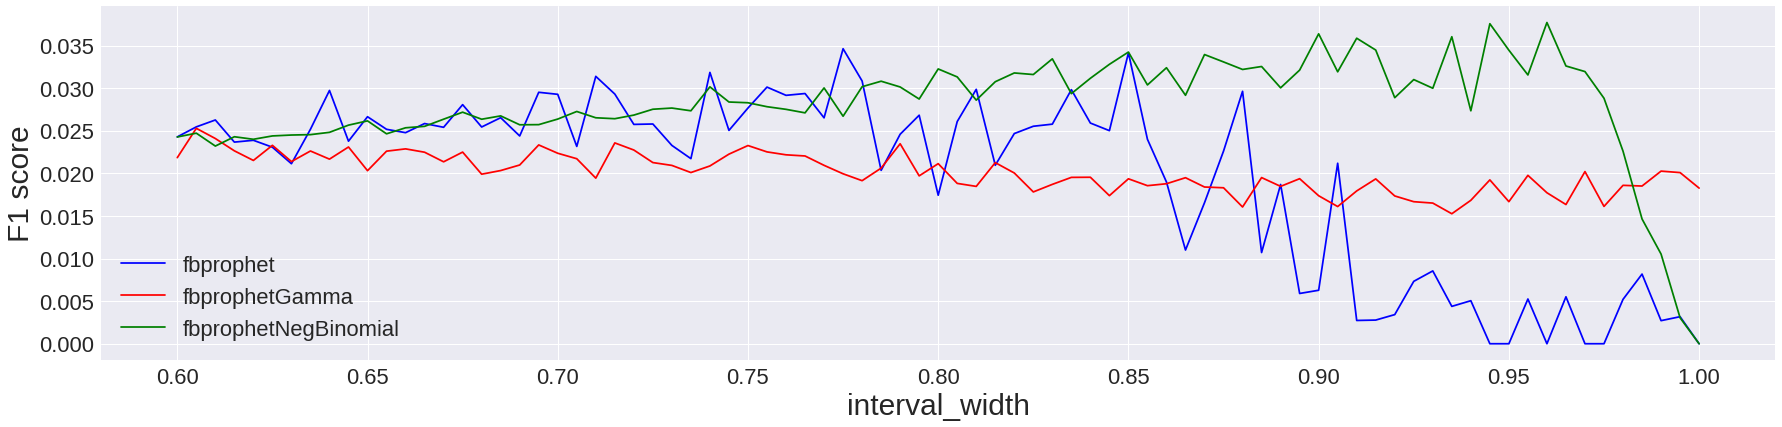

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}


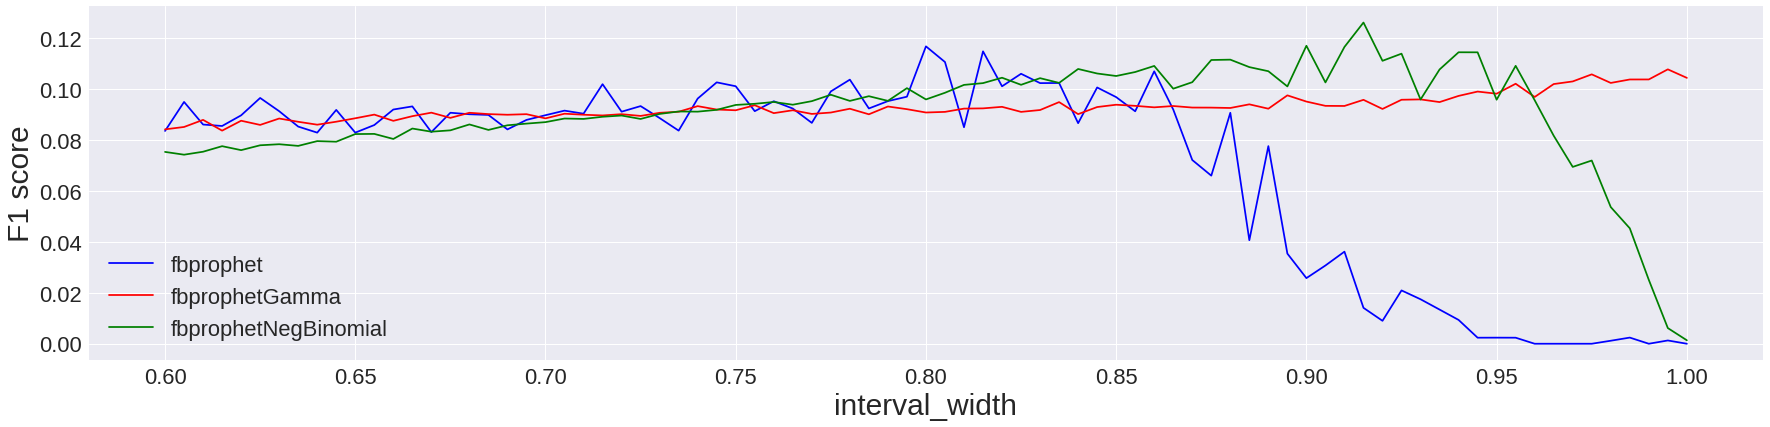

In [26]:
cols = [['total', 'seat'], ['gift_certificate'], ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]] # ('SPU-DME', 'seat'), ('RHO-DME', 'meal')]
scenarios = [{'anom_coeff': 0.833,
              'num_anomalies': 1,
              'in_a_row': False
             },
             {'anom_coeff': 0.66,
              'num_anomalies': 1,
              'in_a_row': False
             },
             {'anom_coeff': 0,
              'num_anomalies': 1,
              'in_a_row': False
             },
             {'anom_coeff': 0,
              'num_anomalies': 3,
              'in_a_row': True
             }
]

for target in cols:
    for params in scenarios:
        fig, ax = plt.subplots(figsize=(30, 6.5))
        print(f'Target = {target}\tParams = {params}')
        for m, color in [('fbprophet', 'blue'), ('fbprophetGamma', 'red'), ('fbprophetNB', 'green')]:
            a = reports[(reports.model == m) & 
                             (reports.target_col.isin(target)) & 
                             (reports.num_anomalies == params['num_anomalies']) & 
                             (reports.anom_coeff == params['anom_coeff'])].sort_values('interval_width')
            a = a.groupby('interval_width').mean().reset_index()
            mm = m if m != 'fbprophetNB' else 'fbprophetNegBinomial'
            plt.plot(a.interval_width, a.f1_score, color=color, label=f'{mm}')
        plt.xlabel('interval_width', fontsize=30)
        plt.ylabel('F1 score', fontsize=30)
        plt.legend(fontsize=22)
        plt.xticks(fontsize=22)
        plt.yticks(fontsize=22)
        plt.show()

Target = ['total', 'seat']


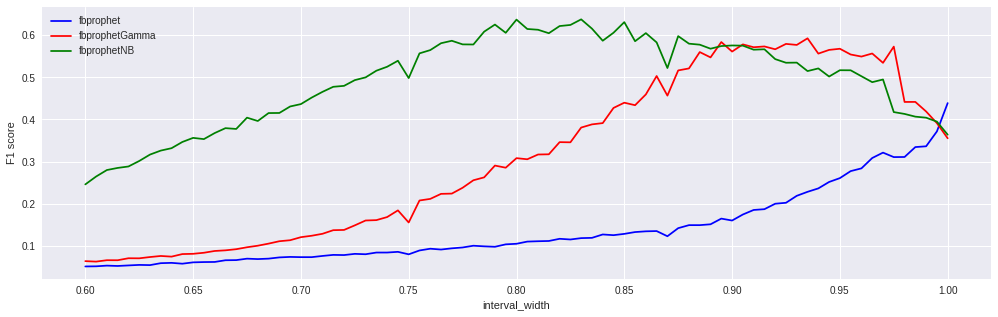

Target = ['gift_certificate']


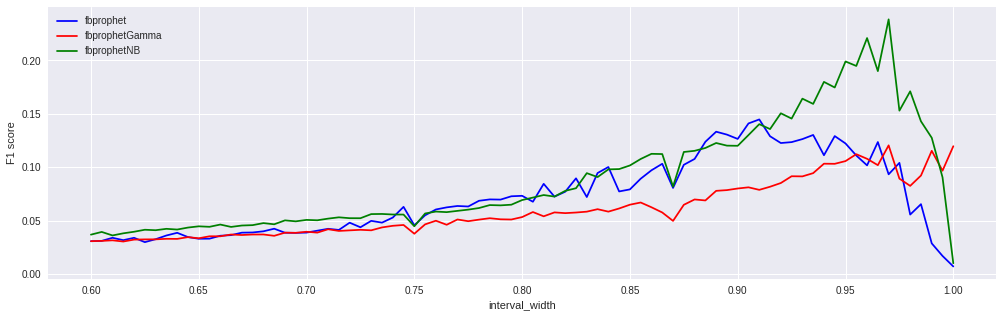

Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]


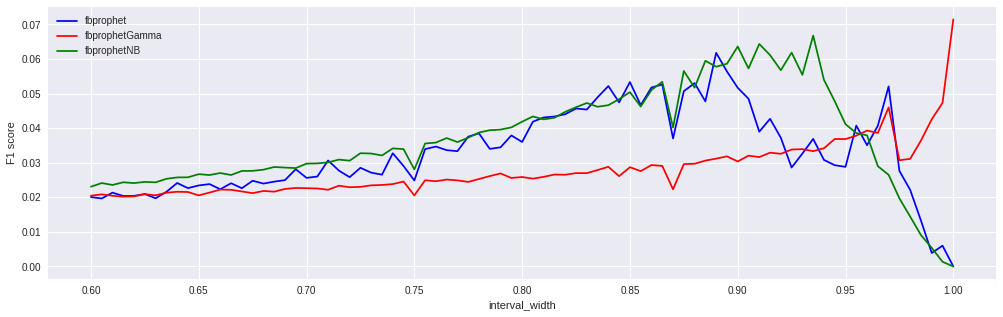

In [14]:
cols = [['total', 'seat'], ['gift_certificate'], ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]] # ('SPU-DME', 'seat'), ('RHO-DME', 'meal')]

for target in cols:
    fig, ax = plt.subplots(figsize=(17, 5))
    print(f'Target = {target}')
    for m, color in [('fbprophet', 'blue'), ('fbprophetGamma', 'red'), ('fbprophetNB', 'green')]:
        a = reports[(reports.model == m) & 
                    (reports.target_col.isin(target))].sort_values('interval_width')
        a = a.groupby('interval_width').mean().reset_index()
        plt.plot(a.interval_width, a.f1_score, color=color, label=f'{m}')
    plt.xlabel('interval_width')
    plt.ylabel('F1 score')
    plt.legend()
    #plt.xticks(np.arange(0.9, 1.005, 0.005))
    plt.show()

In [114]:
reports = pd.read_csv('../reports/files/scores_window_2_old.csv')

In [115]:
cols = [['total', 'seat'], ['gift_certificate'], ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]] # ('SPU-DME', 'seat'), ('RHO-DME', 'meal')]
scenarios = [#{'anom_coeff': 0.833,
#               'num_anomalies': 1,
#               'in_a_row': False
#              },
#              {'anom_coeff': 0.66,
#               'num_anomalies': 1,
#               'in_a_row': False
#              },
#              {'anom_coeff': 0,
#               'num_anomalies': 1,
#               'in_a_row': False
#              },
             {'anom_coeff': 0,
              'num_anomalies': 3,
              'in_a_row': True
             }
]

for target in cols:
    print(f'Target = {target}')
    for params in scenarios:
        print(f'\tParams = {params}')
        for m, color in [('fbprophet', 'blue'), ('fbprophetGamma', 'red'), ('fbprophetNB', 'green')]:
            print('\033[95m' + f'\t\tModel = {m}' + '\033[0m')
            score_max = 0
            w_max = 0
            a = reports[(reports.target_col.isin(target)) & 
                        (reports.model == m) & 
                        (reports.num_anomalies == params['num_anomalies']) & 
                        (reports.anom_coeff == params['anom_coeff'])]
            a = a.groupby('interval_width')[['f1_score']].mean().reset_index()
            for i, x in a.iterrows():
#                 print(f'\t\t\tWidth = {x.interval_width}\tF1 = {x.f1_score}')
                if x.f1_score >= score_max:
                    score_max = x.f1_score
                    w_max = x.interval_width
            print('\t\t' + '\033[1m' + f'BEST Width = {w_max}\tBEST F1 = {score_max}' + '\033[0m')
        print('\n')

Target = ['total', 'seat']
	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}
		Model = fbprophet
		BEST Width = 1.0	BEST F1 = 0.955909768829232
		Model = fbprophetGamma
		BEST Width = 1.0	BEST F1 = 0.9861111111111112
		Model = fbprophetNB
		BEST Width = 1.0	BEST F1 = 1.0


Target = ['gift_certificate']
	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}
		Model = fbprophet
		BEST Width = 0.93	BEST F1 = 0.5628140703517587
		Model = fbprophetGamma
		BEST Width = 1.0	BEST F1 = 0.6194690265486726
		Model = fbprophetNB
		BEST Width = 0.985	BEST F1 = 0.7659574468085106


Target = ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]
	Params = {'anom_coeff': 0, 'num_anomalies': 3, 'in_a_row': True}
		Model = fbprophet
		BEST Width = 0.91	BEST F1 = 0.19694346487664538
		Model = fbprophetGamma
		BEST Width = 1.0	BEST F1 = 0.3865911552964962
		Model = fbprophetNB
		BEST Width = 0.945	BEST F1 = 0.2389316668526578




In [18]:
cols = [['total', 'seat'], ['gift_certificate'], ["('AAQ-DME', 'auto_checkin')", "('DME-GDZ', 'auto_checkin')", "('DME-ORY', 'seat')"]] # ('SPU-DME', 'seat'), ('RHO-DME', 'meal')]
scenarios = [{'anom_coeff': 0.833,
              'num_anomalies': 1,
              'in_a_row': False
             },
             {'anom_coeff': 0.66,
              'num_anomalies': 1,
              'in_a_row': False
             },
             {'anom_coeff': 0,
              'num_anomalies': 1,
              'in_a_row': False
             },
             {'anom_coeff': 0,
              'num_anomalies': 3,
              'in_a_row': True
             }
]

for target in cols:
    print(f'Target = {target}')
    for params in scenarios:
        print(f'\tParams = {params}')
        for m, color in [('fbprophet', 'blue'), ('fbprophetGamma', 'red'), ('fbprophetNB', 'green')]:
            print('\033[95m' + f'\t\tModel = {m}' + '\033[0m')
            
            a = reports_1[(reports_1.target_col.isin(target)) & 
                        (reports_1.model == m) & 
                        (reports_1.interval_width == 0.95) & 
                        (reports_1.num_anomalies == params['num_anomalies']) & 
                        (reports_1.anom_coeff == params['anom_coeff'])]
            print('\t\t' + '\033[1m' + f'F1 = {a.f1_score.max()} \tPrecision = {a.precision.max()} \tRecall = {a.recall.max()}' + '\033[0m')
        print('\n')

Target = ['total', 'seat']
	Params = {'anom_coeff': 0.833, 'num_anomalies': 1, 'in_a_row': False}
		Model = fbprophet
		F1 = 0.08379888268156425 	Precision = 0.048701298701298704 	Recall = 0.3
		Model = fbprophetGamma
		F1 = 0.0392156862745098 	Precision = 1.0 	Recall = 0.02
		Model = fbprophetNB
		F1 = 0.0392156862745098 	Precision = 1.0 	Recall = 0.02


	Params = {'anom_coeff': 0.66, 'num_anomalies': 1, 'in_a_row': False}
		Model = fbprophet
		F1 = 0.24376731301939056 	Precision = 0.1414790996784566 	Recall = 0.88
		Model = fbprophetGamma
		F1 = 0.2456140350877193 	Precision = 1.0 	Recall = 0.14
		Model = fbprophetNB
		F1 = 0.3050847457627119 	Precision = 1.0 	Recall = 0.18


	Params = {'anom_coeff': 0, 'num_anomalies': 1, 'in_a_row': False}
		Model = fbprophet
		F1 = 0.3184713375796178 	Precision = 0.1893939393939394 	Recall = 1.0
		Model = fbprophetGamma
		F1 = 0.98989898989899 	Precision = 1.0 	Recall = 0.98
		Model = fbprophetNB
		F1 = 1.0 	Precision = 1.0 	Recall = 1.0


	Params